In [14]:
#05-1. 결정 트리

import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

wine.head()
#class : '0'은 레드와인, '1'은 화이트와인
#화이트 와인이 양성 클래스

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [16]:
wine.describe()

## 2사분위수(중간값)는 데이터를 일렬로 늘어놓았을 때 정중앙의 값
## 만약 데이터 개수가 짝수개는 가운데 2개 값의 평균 사용

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


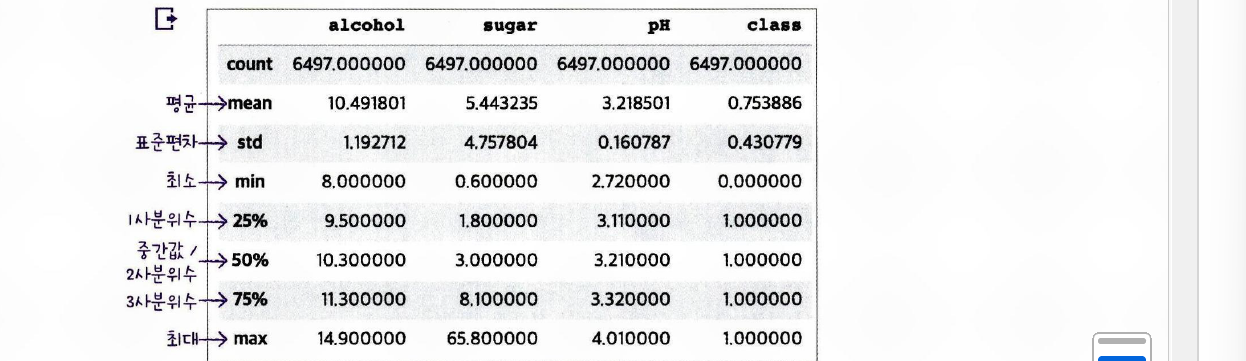

In [17]:
# [1]
data = wine[['alcohol','sugar','pH']]
target = wine['class']

In [18]:
# [2]
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

# train_test_split() 함수 기본값 25%를 테스트 세트로 지정
# 샘플갯수가 많아서 20%만 테스트 세트로 나누어서 test_size = 0.2

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [19]:
# [3] 클래스를 사용해 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [20]:
# [4] 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

#과소적합 경향 ---> 매개변수 변경?


0.7808350971714451
0.7776923076923077


In [21]:
#🪽설명하기 쉬운 모델과 어려운 모델
#모델을 설명하기 위해 로지스틱 회귀가 학습한 계수,절편 파악

print(lr.coef_, lr.intercept_)

#알코올 도수 값에 0.512..곱하고
#당도에 1.6733..곱하고
#pH값에 -6877..곱하고
#1.81..을 더한다.
# 이 값이 0보다 크면 화이트 와인, 작으면 레드 와인, 지금까지는 78% 정도만 화이트 와인으로 분류!

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [25]:
#🎄결정트리 : 순서도 처럼 쉽게 설명해서 가져오세요~
# 사이킷런의 DecisionTreeClassifier 클래스를 사용해 결정 트리 모델 훈련

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 세트

0.996921300750433
0.8592307692307692


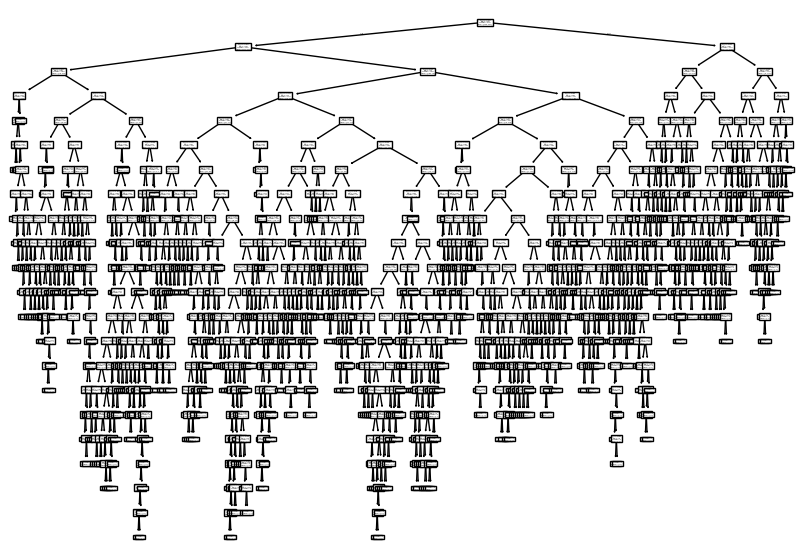

In [27]:
#🎄시각화

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

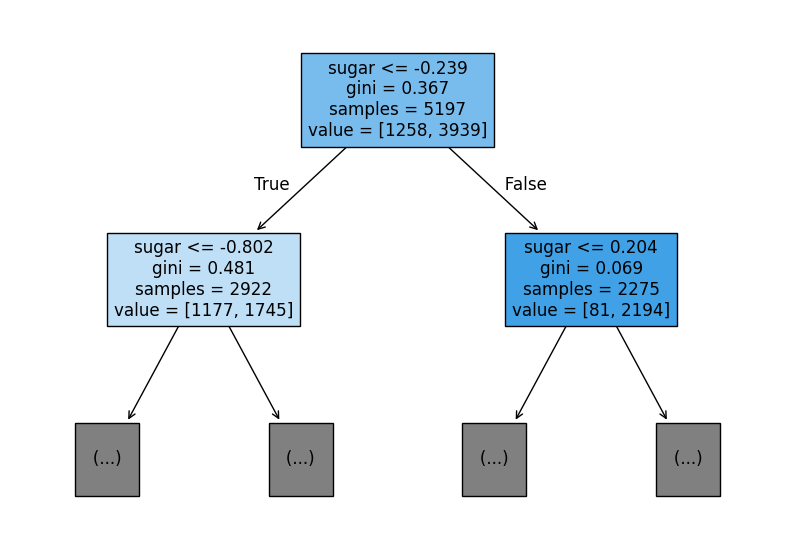

In [ ]:
#🎄깊이 제한
#max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장
#filled : 노드의 색
#feature_names : 특성의 이름 전달
plt.figure(figsize=(10,7)) # figsize=(높이 인치,넓이 인치)
plot_tree(dt, max_depth=1, filled=True, #클래스의 비율이 높아질 수록 색이 진해짐
          feature_names=['alcohol','sugar','pH'])
plt.show()

#리프 노드에서 가장 많은 클래스가 예측 클래스가 됨(KNN과 비슷)
# (-0.239)를 기준으로 노드를 나눈 기준 : criterion 매개변수에 저장한 지니 불순도 사용

In [ ]:
#‼️만약 여기서 성장을 멈추면 두 노드 모두 양성클래스 갯수가 많아서 양성클래스로 예측된다.

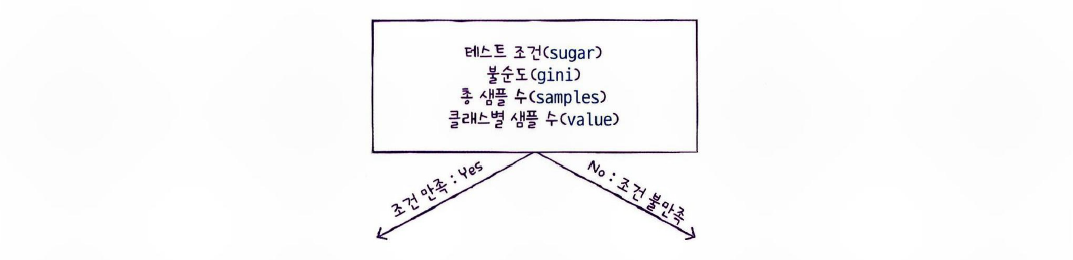

In [ ]:
#불순도(지니) 계산🧮

#어떤 노드 두 클래스 비율이 1/2 이면 불순도 0.5
#어떤 노드 하나 클래스만 있다면 불순도는 0

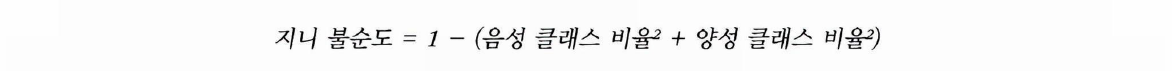
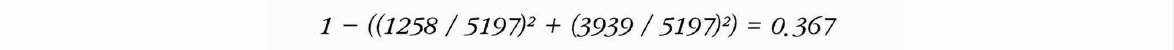

In [ ]:
#🎄‼️부모 노드와 자식 노드 불순도 차이가 크도록!
#--자식 노드의 불순도를 샘플 개수에 비례하게 모두 더해 부모 노드의 불순도에서 minus

#부모와 자식 노드 사이의 불순도 차이 --> '정보이득'

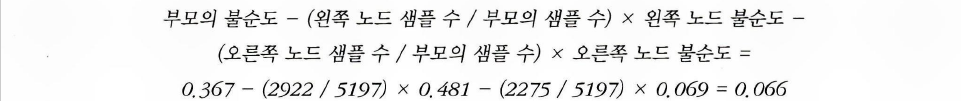

In [ ]:
#불순도(2)_criterion=‘entropy’
#--gini 불순도와 같이 제곱이 아니라 🤍밑이 2인 로그를 사용하여 곱함

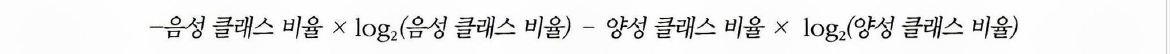
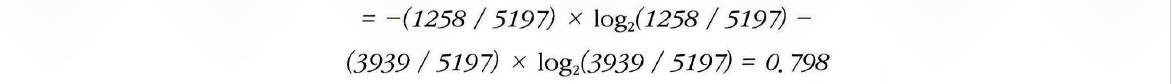

In [ ]:
# 가지치기
#🤍결정 트리에서 가지치기를 간단한 방법 : 트리의 최대 깊이를 지정

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


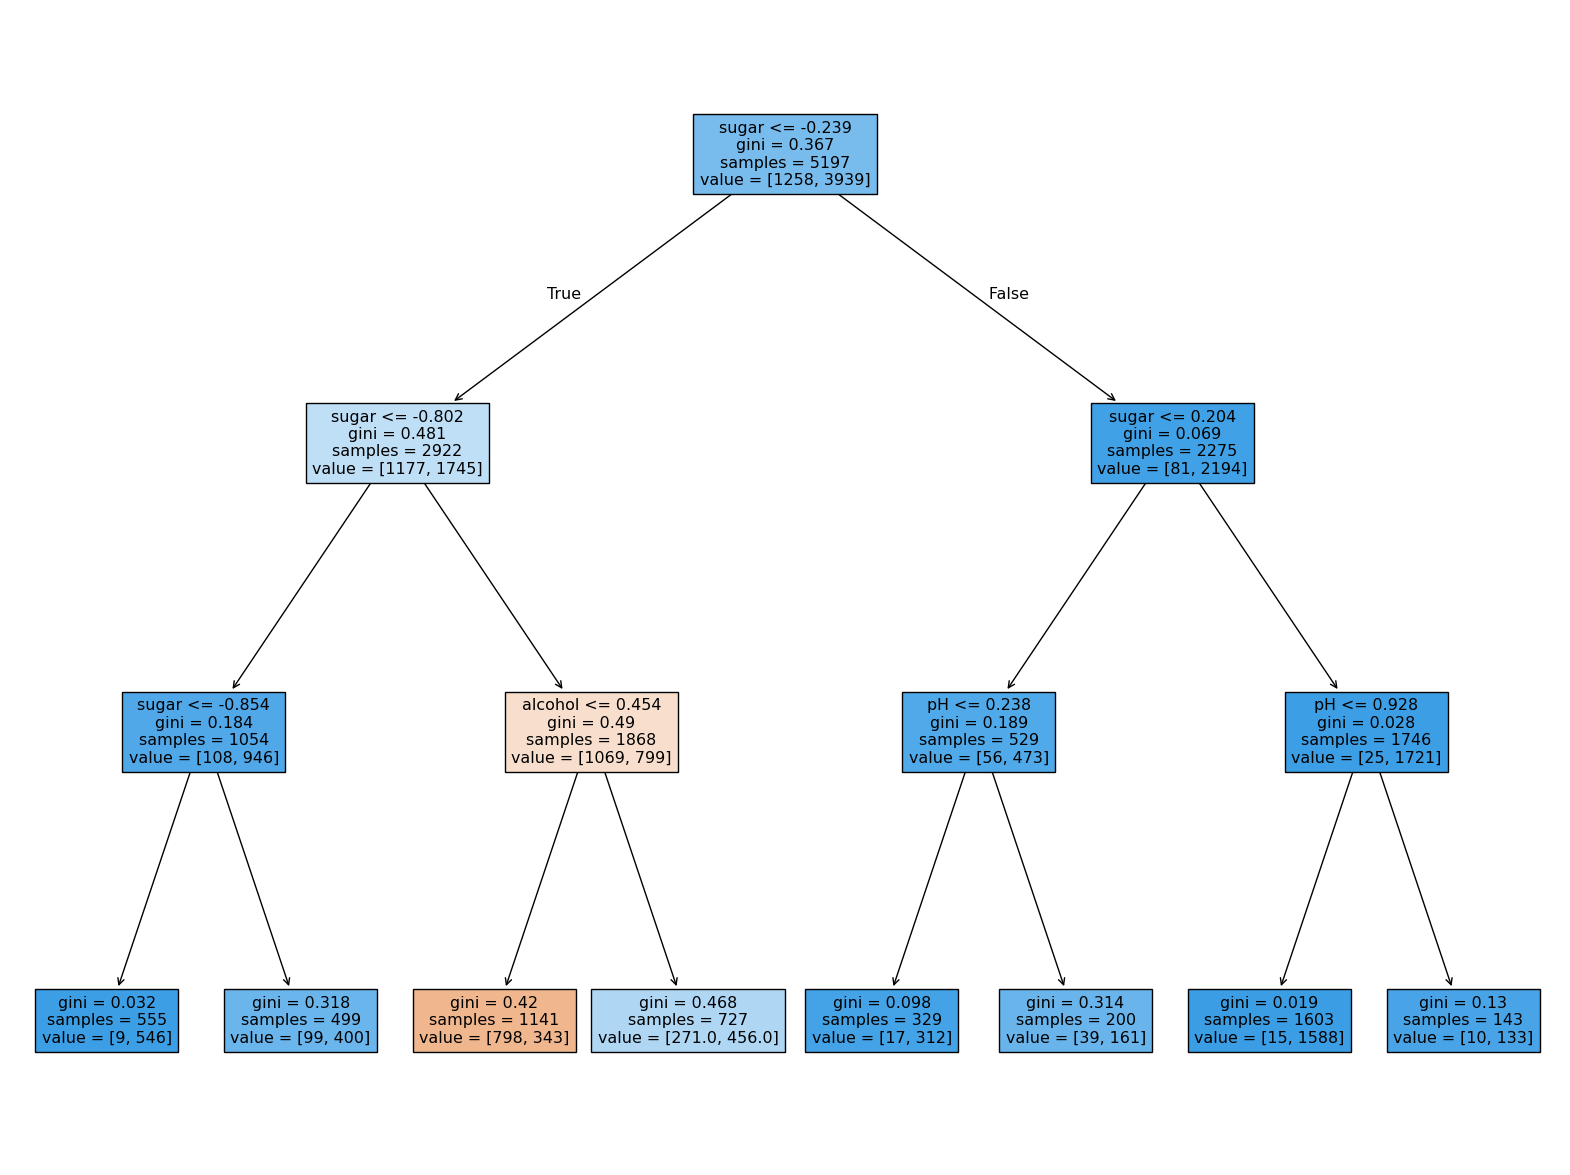

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

# 마지막 노드(깊이3)를 리프노드라고 함

In [ ]:
#전처리 전의 훈련세트 및 테스트 세트!

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target)) 
print(dt.score(test_input, test_target)) 


0.8454877814123533
0.8415384615384616


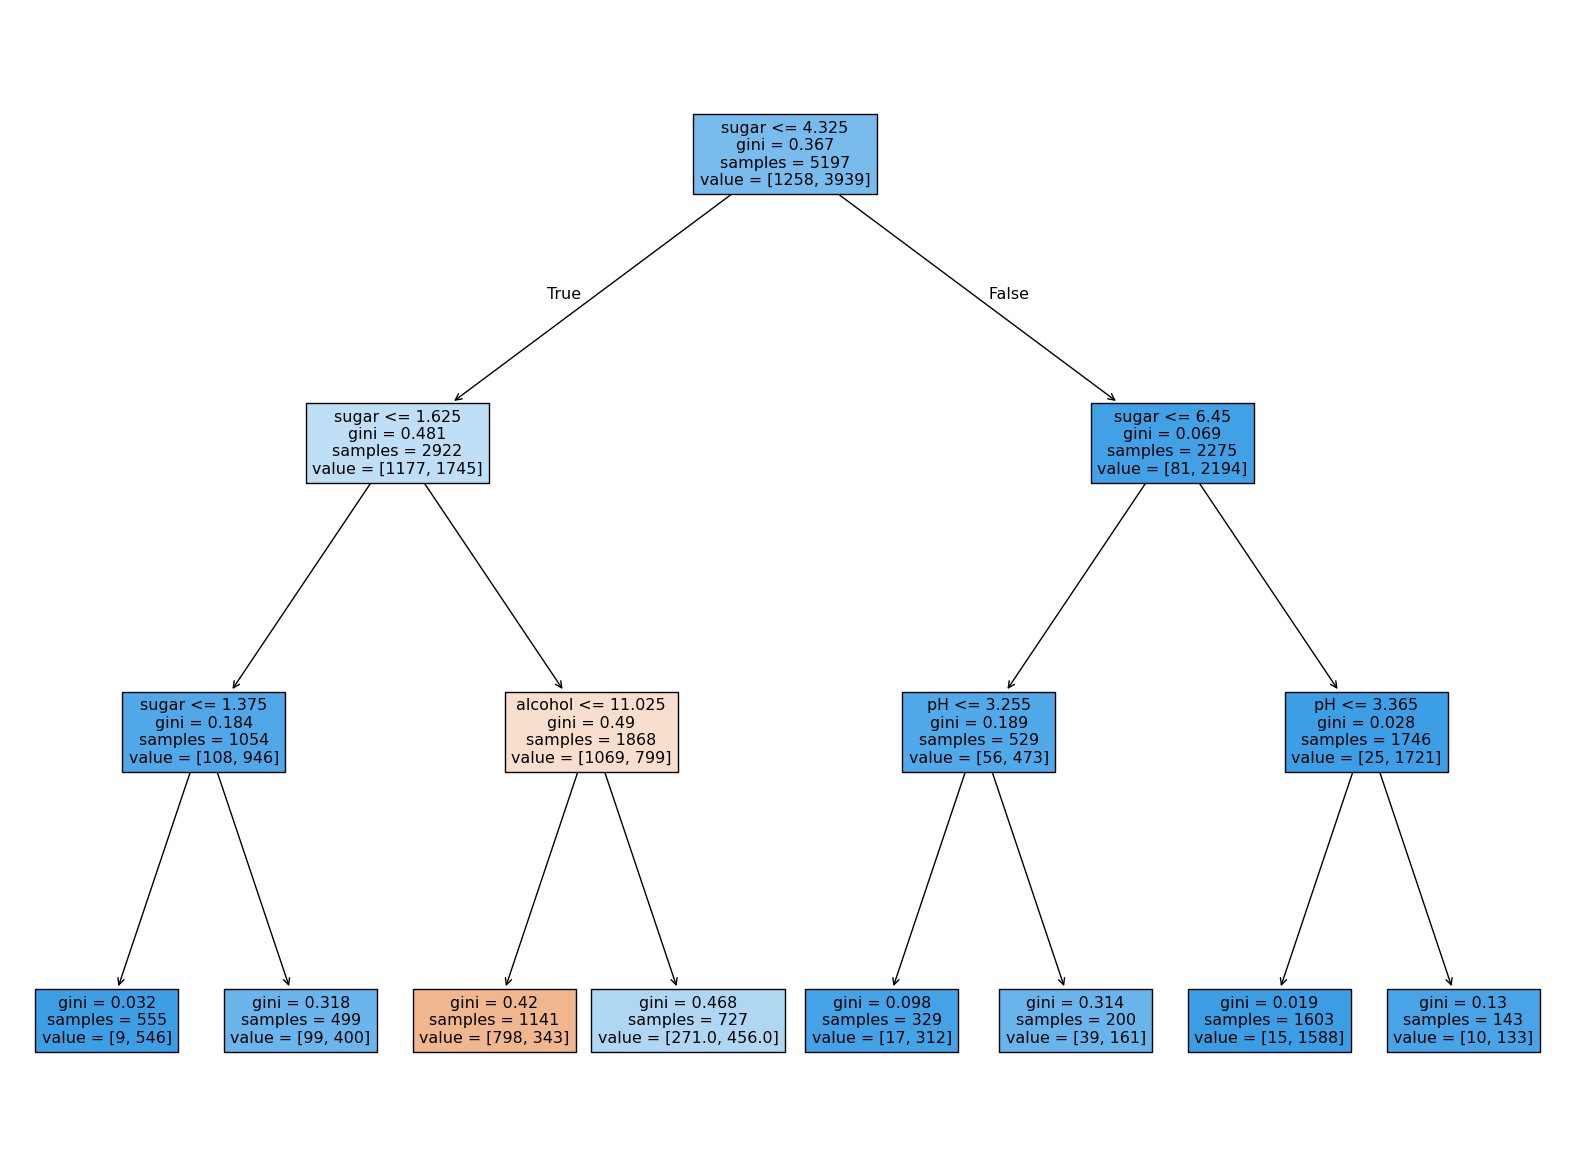

In [34]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [ ]:
#🎄결정 트리는 어떤 특성이 가장 유용한지 나타냄 '특성 중요도'
print(dt.feature_importances_)

#두번째 특성인 당도가 중요도를 가장 높게 나타내고 있음!
#모두 더하면 1이 됨.
#특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별 더하여 계산


[0.12345626 0.86862934 0.0079144 ]


🎄마무리      

1. 결정 트리: yes/no 에 대한 질문을 이어나가면서 정답을 찾아 학습하는 알고리즘      
2. 불순도: 결정 트리가 최적의 질문을 찾기 위한 기준(gini, 엔트로피)     
3. 정보이득: 부모 노드와 자식 노드의 불순도 차이        
4. 가지치기: 결정 트리의 성장을 제한        
5. 특성 중요도: 결정 트리에 사용된 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값     

🎄pandas
1. info(): 데이터프레임의 요약된 정보 출력      
2. describe(): 데이터프레임 열의 통계 값 제공       
3. DecisionTreeClassifier: 결정 트리 분류 클래스        
4. plot_tree(): 결정 트리 모델 시각화